# Differential Equations and \(e^{At}\)

## 1) Definition

Consider a **system of linear differential equations**:

$$
\frac{d\mathbf{x}}{dt} = A \mathbf{x}, \quad \mathbf{x}(0) = \mathbf{x}_0
$$

where \(A \in \mathbb{R}^{n \times n}\).  

**Matrix Exponential Solution:** The solution is given by:

$$
\mathbf{x}(t) = e^{At} \mathbf{x}_0
$$

where the **matrix exponential** is defined as:

$$
e^{At} = \sum_{k=0}^{\infty} \frac{(At)^k}{k!}
$$

If \(A\) is diagonalizable:

$$
A = P D P^{-1} \quad \Rightarrow \quad e^{At} = P e^{Dt} P^{-1}, \quad e^{Dt} = \text{diag}(e^{\lambda_1 t}, \dots, e^{\lambda_n t})
$$


## 2) Derivation

1. Start from the differential equation:
$$
\frac{d\mathbf{x}}{dt} = A \mathbf{x}
$$

2. Seek solution in the form:
$$
\mathbf{x}(t) = e^{At} \mathbf{x}_0
$$

3. Substitute into the differential equation:
$$
\frac{d}{dt} (e^{At} \mathbf{x}_0) = A e^{At} \mathbf{x}_0 = A \mathbf{x}(t)
$$
This satisfies the differential equation.

4. **Matrix Exponential Definition:**
$$
e^{At} = I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \dots
$$

5. If \(A\) is diagonalizable \(A = P D P^{-1}\):
$$
e^{At} = P e^{Dt} P^{-1}, \quad e^{Dt} = \text{diag}(e^{\lambda_1 t}, \dots, e^{\lambda_n t})
$$
This makes computation efficient.


## 3) Computation Steps

**Step 1:** Identify the system $$ (\frac{d\mathbf{x}}{dt} = A \mathbf{x}) and initial condition (\mathbf{x}_0). $$

**Step 2:** Compute the matrix exponential:
$$
e^{At} = \sum_{k=0}^{\infty} \frac{(At)^k}{k!}
$$

**Step 3:** If \(A\) is diagonalizable \(A = P D P^{-1}\), compute:
$$
e^{At} = P e^{Dt} P^{-1}, \quad e^{Dt} = \text{diag}(e^{\lambda_1 t}, \dots, e^{\lambda_n t})
$$

**Step 4:** Compute solution at each time point:
$$
\mathbf{x}(t) = e^{At} \mathbf{x}_0
$$


In [3]:
import jax.numpy as jnp
from jax.scipy.linalg import expm

# Example matrix
A = jnp.array([[0., 1.],
               [-2., -3.]])
x0 = jnp.array([1., 0.])

# Time points
t_points = jnp.linspace(0, 5, 10)  # reduced to 10 points for readability

# Compute x(t) = e^{At} x0 for each t
x_t = jnp.array([expm(A*t) @ x0 for t in t_points])

print("Shape of solution array:", x_t.shape)
print("\nSolution x(t) at each time point:")
for i, t in enumerate(t_points):
    print(f"t = {t:.2f} -> x(t) = {x_t[i]}")


Shape of solution array: (10, 2)

Solution x(t) at each time point:
t = 0.00 -> x(t) = [1. 0.]
t = 0.56 -> x(t) = [ 0.8183138  -0.48912093]
t = 1.11 -> x(t) = [ 0.55001795 -0.44164988]
t = 1.67 -> x(t) = [ 0.34207708 -0.30640316]
t = 2.22 -> x(t) = [ 0.20499243 -0.19324876]
t = 2.78 -> x(t) = [ 0.12048709 -0.11662118]
t = 3.33 -> x(t) = [ 0.0700753  -0.06880268]
t = 3.89 -> x(t) = [ 0.0405172  -0.04009826]
t = 4.44 -> x(t) = [ 0.02334935 -0.02321143]
t = 5.00 -> x(t) = [ 0.01343051 -0.01338511]


## 4 Plotting


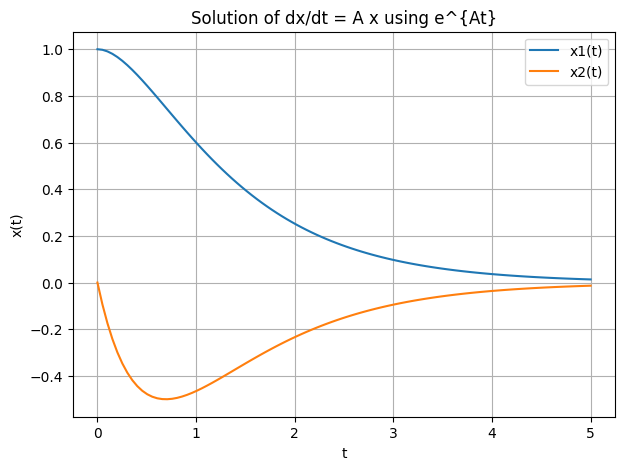

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.plot(t_points, x_t[:,0], label='x1(t)')
plt.plot(t_points, x_t[:,1], label='x2(t)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solution of dx/dt = A x using e^{At}')
plt.grid(True)
plt.legend()
plt.show()


## 5) Use Cases of Matrix Exponential in Differential Equations

1. **Linear ODE Systems:** Solve systems of linear differential equations efficiently:
$$
\frac{d\mathbf{x}}{dt} = A \mathbf{x}, \quad \mathbf{x}(0) = \mathbf{x}_0, \quad \mathbf{x}(t) = e^{At} \mathbf{x}_0
$$

2. **Control Theory:** Analyze state-space systems:
$$
\dot{\mathbf{x}} = A \mathbf{x} + B \mathbf{u}, \quad \mathbf{x}(t) = e^{At} \mathbf{x}_0 + \int_0^t e^{A(t-\tau)} B \mathbf{u}(\tau) d\tau
$$

3. **Population Dynamics:** Solve multi-species linear interaction models:
$$
\frac{d\mathbf{p}}{dt} = A \mathbf{p}, \quad \mathbf{p}(t) = e^{At} \mathbf{p}_0
$$

4. **Mechanical Systems:** Solve linearized dynamics of masses, springs, and dampers:
$$
\mathbf{\ddot{x}} + C \mathbf{\dot{x}} + K \mathbf{x} = 0 \quad \Rightarrow \quad \mathbf{x}(t) = e^{At} \mathbf{x}_0
$$

5. **Markov Chains:** Continuous-time Markov processes:
$$
P(t) = e^{Qt}, \quad Q \text{ is the generator matrix}
$$

6. **Quantum Mechanics:** Time evolution of state vectors under Hamiltonians $H$:
$$
|\psi(t)\rangle = e^{-i H t} |\psi(0)\rangle
$$
